In [ ]:
import numpy as np
import pandas as pd

import scipy.stats as stats # to plot qq plot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('train.csv', usecols=['Age', 'Fare', 'Survived'])

In [6]:
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [7]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [8]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [10]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
x = df.iloc[:,1:3]
y = df.iloc[:,0]

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

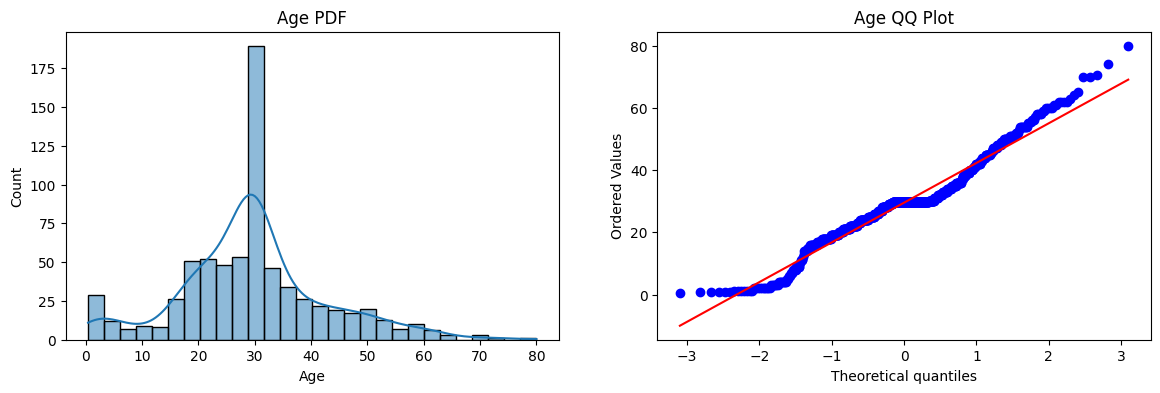

In [29]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Age'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Age'], dist ="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

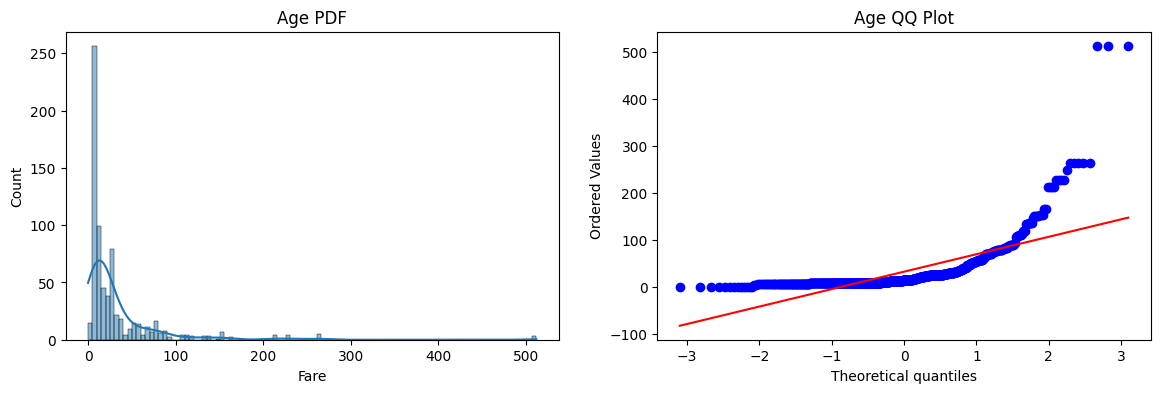

In [30]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.histplot(x_train['Fare'], kde=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(x_train['Fare'], dist ="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [35]:
clf = LogisticRegression()
clf1 = DecisionTreeClassifier()

In [59]:
clf.fit(x_train, y_train)
clf1.fit(x_train, y_train)

y_pred = clf.predict(x_test)
y_pred1 = clf1.predict(x_test)

print("Accuracy LR : ", accuracy_score(y_test, y_pred))
print("Accuracy DT : ", accuracy_score(y_test, y_pred1))

Accuracy LR :  0.6480446927374302
Accuracy DT :  0.6815642458100558


In [40]:
trf = FunctionTransformer(func=np.log1p)

In [96]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [103]:
clf4 = LogisticRegression()
clf5 = DecisionTreeClassifier()

clf4.fit(x_train_trf, y_train)
clf5.fit(x_train_trf, y_train)

y_pred2 = clf4.predict(x_test_trf)
y_pred3 = clf5.predict(x_test_trf)

print("Accuracy LR : ", accuracy_score(y_test, y_pred2))
print("Accuracy DT : ", accuracy_score(y_test, y_pred3))

Accuracy LR :  0.6815642458100558
Accuracy DT :  0.6815642458100558


In [108]:
x_trf = trf.fit_transform(x)

clf9 = LogisticRegression()
clf8 = DecisionTreeClassifier()

print("LR : ", np.mean(cross_val_score(clf9, x_trf, y, scoring='accuracy', cv=10)))
print("DT : ", np.mean(cross_val_score(clf8, x_trf, y, scoring='accuracy', cv=10)))

LR :  0.678027465667915
DT :  0.6577028714107366


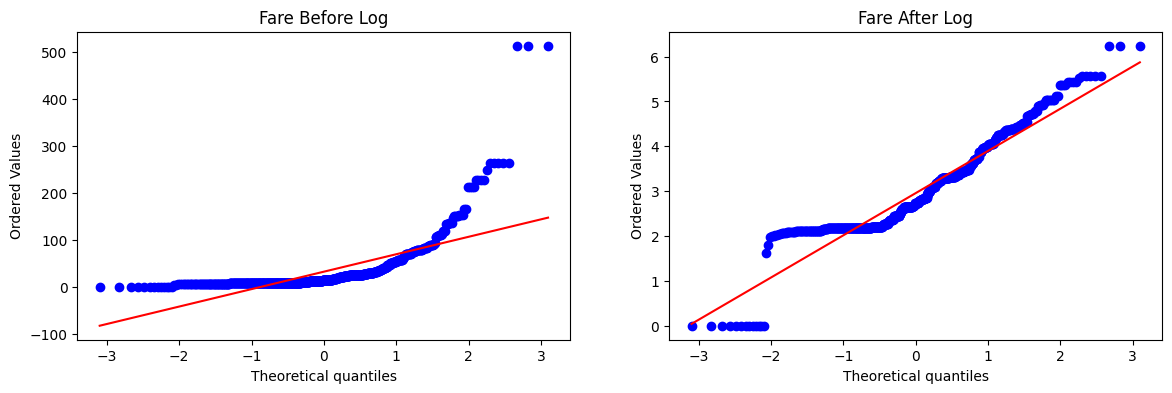

In [109]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_trf['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

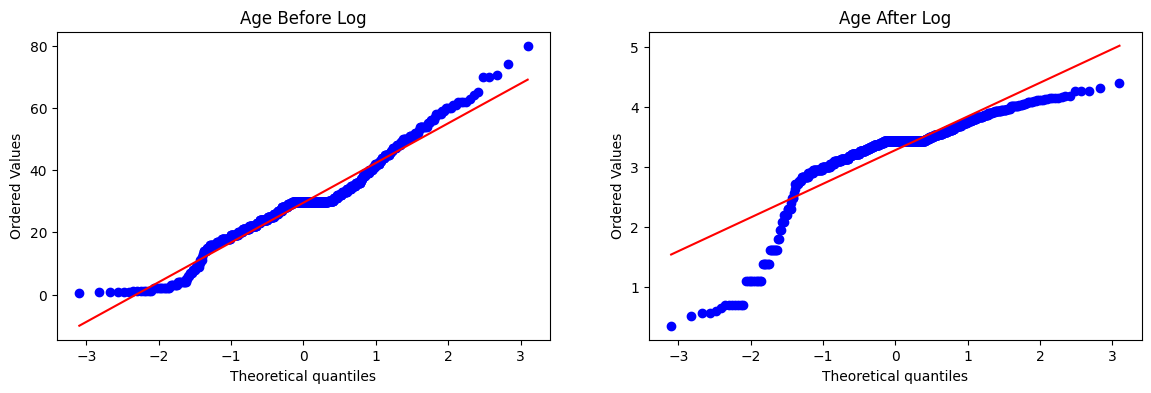

In [110]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_trf['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [111]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

x_train_trf2 = trf2.fit_transform(x_train)
x_test_trf2 = trf2.transform(x_test)

In [112]:
clf11 = LogisticRegression()
clf12 = DecisionTreeClassifier()

clf11.fit(x_train_trf2,y_train)
clf12.fit(x_train_trf2,y_train)
    
y_pred11 = clf11.predict(x_test_trf2)
y_pred12 = clf12.predict(x_test_trf2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred11))
print("Accuracy DT",accuracy_score(y_test,y_pred12))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6871508379888268


In [116]:
def apply_transform(transform):
    x = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    x_trans = trf.fit_transform(x)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,x_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(x['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(x_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()
    

Accuracy 0.6589013732833957


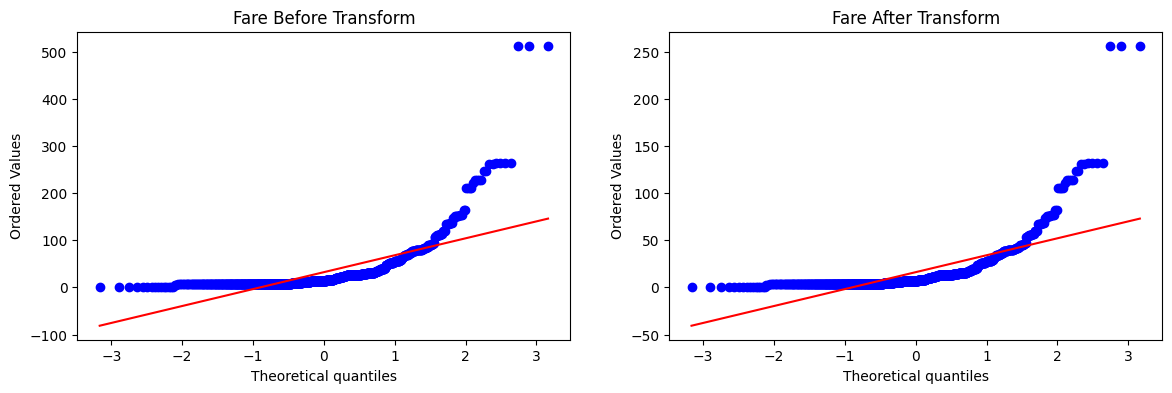

In [ ]:
apply_transform(lambda x : x/2)